In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the variable data into a NumPy array
variable = np.array([1, 3, 2, 5, 4, 6])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the variable data and transform the data
scaled_variable = scaler.fit_transform(variable.reshape(-1, 1)).flatten()

# Print the scaled variable
print(scaled_variable)


[-1.46385011 -0.29277002 -0.87831007  0.87831007  0.29277002  1.46385011]


In [7]:
import geopandas as gpd
DB11= gpd.read_file('https://github.com/TJZLiu/Lisbon-freguesias/blob/main/data/census%202011/BGRI2011_1106_all.gpkg?raw=true')

DB11['N_EDIFICIOS_CLASSICOS_1OU2'] = DB11['N_EDIFICIOS_CLASSICOS_1OU2'].astype(int)

# Keep the independent variables and dependent variable 'FR11' and the geometry data
df_11 = DB11.select_dtypes(include=['int','geometry']).drop(['ANO','NIVEL'], axis=1).copy()
df_11['FR11'] = DB11['FR11']

All_variables = df_11.select_dtypes(include=['int']).columns.to_list()

C:\Users\Desmond\anaconda3\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


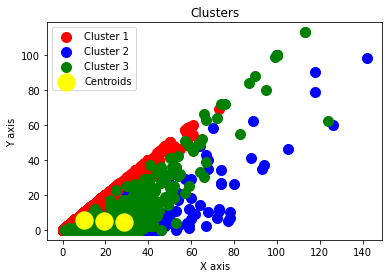

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

# Prepare the data
X = df_11[All_variables].values

# Choose the number of clusters
k = 3

# Initialize the centroids using k-means++
centroids = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X).cluster_centers_

# Compute the distances using the Manhattan distance metric
labels = pairwise_distances_argmin(X, centroids, metric='manhattan')

# Visualize the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()



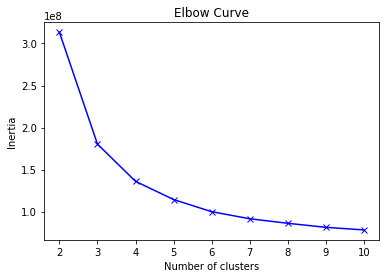

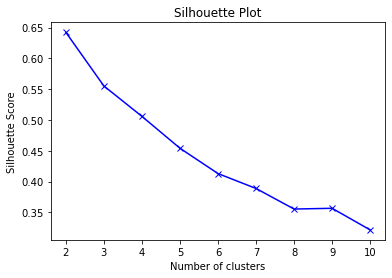

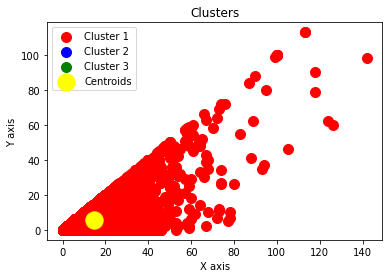

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


# Choose the range of k values to test
k_values = range(2, 11)

# Initialize lists to store inertia and silhouette scores for each k value
inertias = []
silhouette_scores = []

# Iterate over each k value
for k in k_values:
    # Initialize the k-means algorithm
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the k-means algorithm to the data
    kmeans.fit(X)
    
    # Compute the inertia and silhouette score for the clustering
    inertia = kmeans.inertia_
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    
    # Append the inertia and silhouette score to the lists
    inertias.append(inertia)
    silhouette_scores.append(silhouette_score)

# Plot the elbow curve to choose the optimal k value
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores to choose the optimal k value
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

# Choose the optimal k value
optimal_k = np.argmax(silhouette_scores) + 1

# Initialize the k-means algorithm with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the k-means algorithm to the data
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


KeyError: 'std_err'

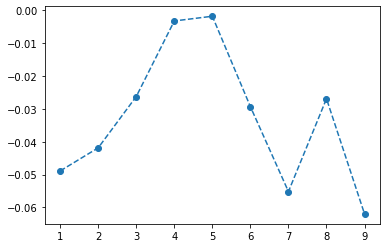

In [42]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK

# Generate some random data
X = np.random.rand(100, 10)

# Compute the optimal number of clusters using the gap statistic
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(X, cluster_array=np.arange(1, 10))

# Fit k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Plot the elbow curve and the gap statistic
gap_df = optimal_k.gap_df
plt.plot(gap_df['n_clusters'], gap_df['gap_value'], linestyle='--', marker='o')
plt.errorbar(gap_df['n_clusters'], gap_df['gap_value'], yerr=gap_df['std_err'], linestyle='--', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.show()

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()


In [48]:
!pip install scikit-learn-extra

In [50]:
from sklearn_extra.cluster import KMeansWithSilhouette
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
X = np.random.rand(100, 10)

# Compute the gap statistic for k-means clustering
n_clusters = range(1, 10)
gap_values = []
for k in n_clusters:
    kmeans = KMeansWithSilhouette(n_clusters=k, random_state=42)
    kmeans.fit(X)
    gap_values.append(kmeans.gap)

# Plot the gap statistic
plt.plot(n_clusters, gap_values, linestyle='--', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.show()

# Fit k-means with the optimal number of clusters
optimal_k = np.argmax(np.array(gap_values)) + 1
kmeans = KMeansWithSilhouette(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()


ImportError: cannot import name 'KMeansWithSilhouette' from 'sklearn_extra.cluster' (C:\Users\Desmond\anaconda3\lib\site-packages\sklearn_extra\cluster\__init__.py)

In [3]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


In [5]:
cluster_df = np.random.rand(100, 10)

C:\Users\Desmond\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Desmond\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Desmond\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Desmond\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from 

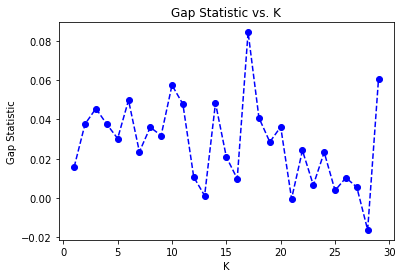

In [6]:
score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\Desmond\AppData\Local\Temp\ipykernel_17164\1116053550.py:38: FutureWarning: The frame.append method is deprecated and will be removed from 

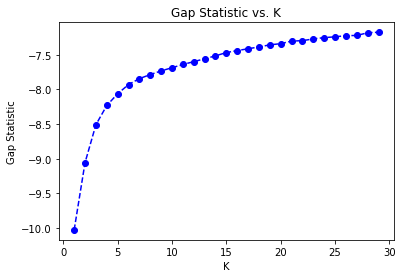

In [11]:
score_g, df = optimalK(X, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [13]:
!pip install yellowbrick

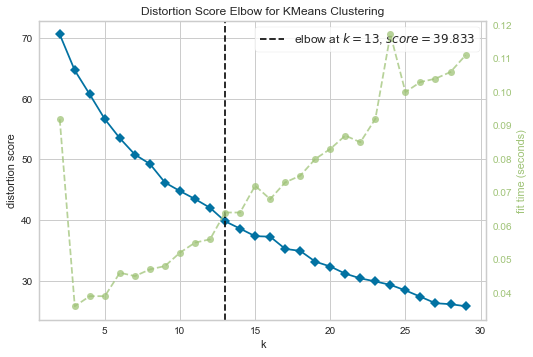

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [15]:
import warnings
warnings.filterwarnings('ignore')

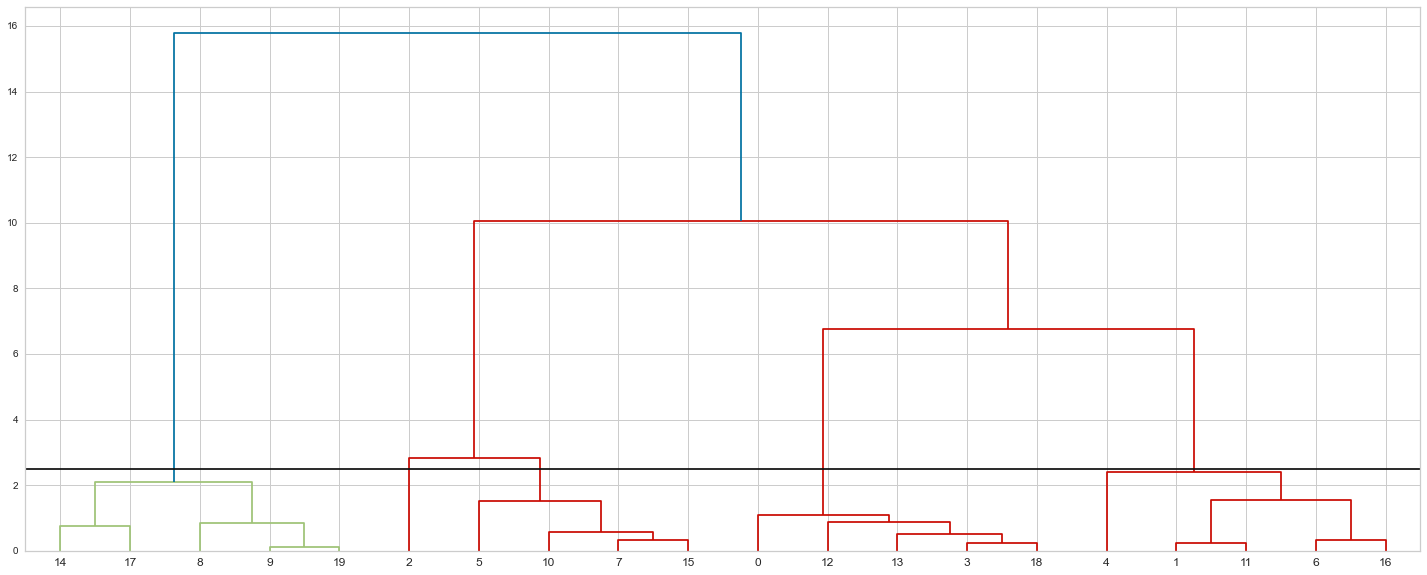

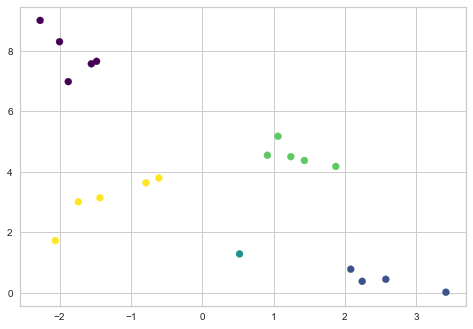

In [16]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y_true = make_blobs(n_samples=20, centers=4, cluster_std=0.60, random_state=0)

# Compute divisive clustering
Z = linkage(X, 'ward')
max_d = 2.5
clusters = fcluster(Z, max_d, criterion='distance')

# Plot dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=max_d, c='k')
plt.show()

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.show()


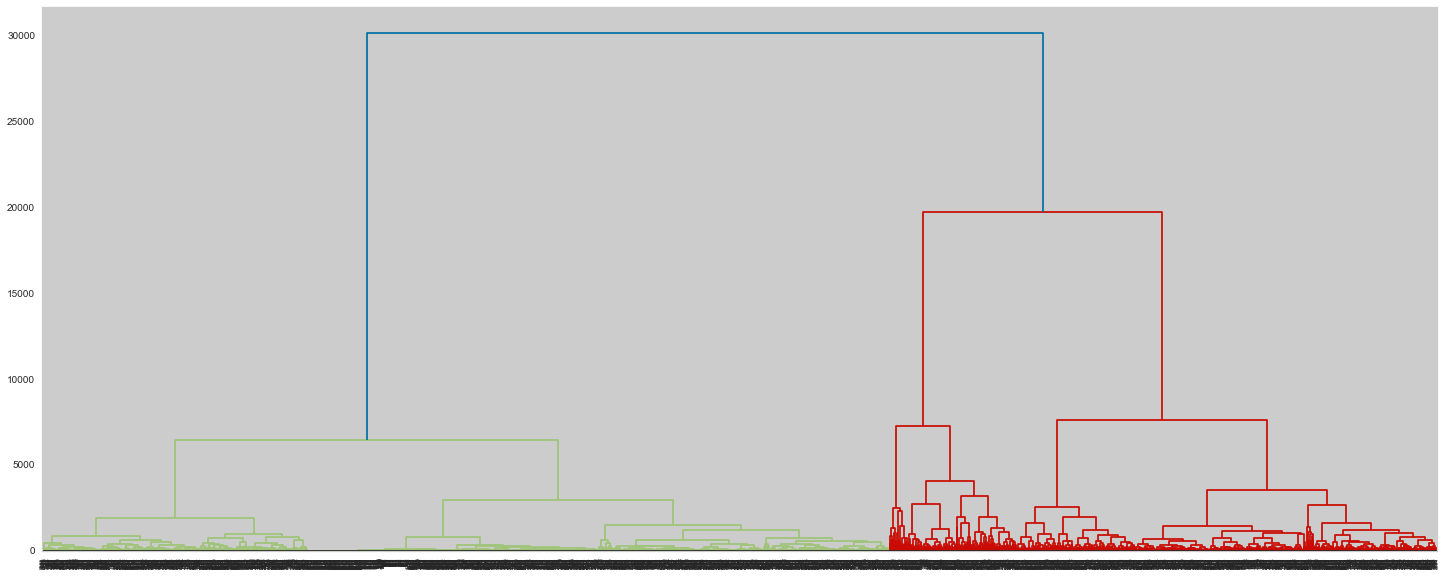

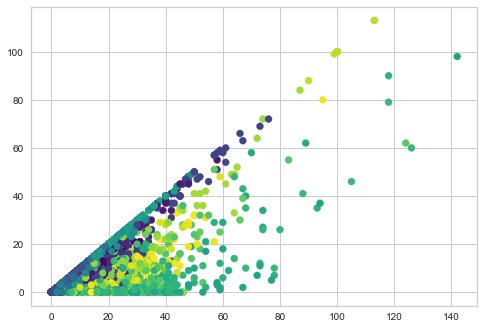

In [17]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X = df_11[All_variables].values

# Compute divisive clustering
Z = linkage(X, 'ward')
max_d = 2.5
clusters = fcluster(Z, max_d, criterion='distance')

# Plot dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=max_d, c='k')
plt.show()

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.show()

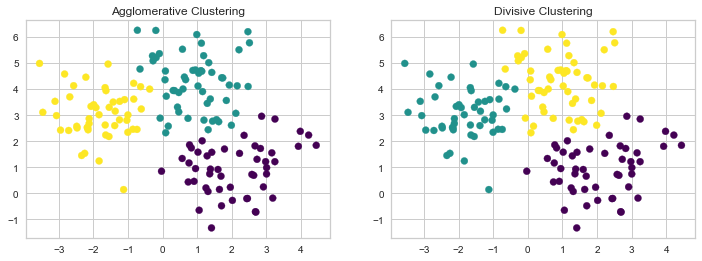

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.datasets import make_blobs

# Generate sample data
np.random.seed(0)
n_samples = 150
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=0)

# Perform agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_clusters = agglo.fit_predict(X)

# Perform divisive clustering
Z = linkage(X, method='ward')
divisive_clusters = fcluster(Z, t=3, criterion='maxclust')

# Plot the results
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=agglo_clusters, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=divisive_clusters, cmap='viridis')
plt.title('Divisive Clustering')

plt.show()


In [20]:
X = df_11[All_variables].values

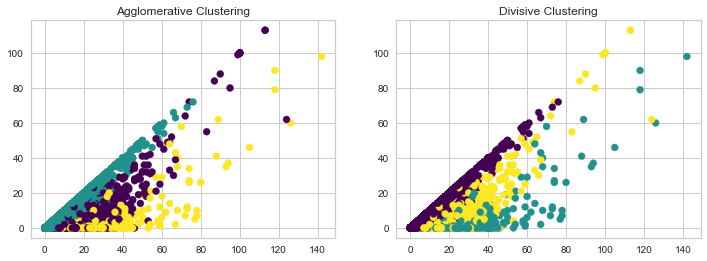

In [21]:
# Perform agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_clusters = agglo.fit_predict(X)

# Perform divisive clustering
Z = linkage(X, method='ward')
divisive_clusters = fcluster(Z, t=3, criterion='maxclust')

# Plot the results
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=agglo_clusters, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=divisive_clusters, cmap='viridis')
plt.title('Divisive Clustering')

plt.show()

TypeError: no numeric data to plot

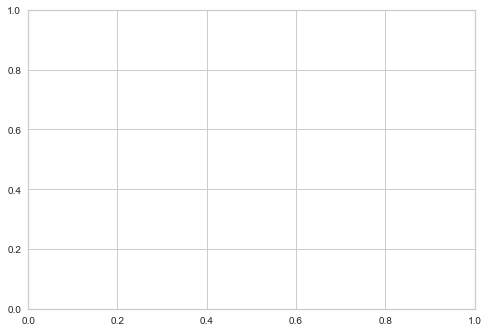

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe with four variables in one column
df = pd.DataFrame({'Values': [2, 4, 6, 8, 10, 12, 14, 16],
                   'Variable': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D']})

# group the dataframe by the 'Variable' column and create a line plot for each group
fig, ax = plt.subplots()
for name, group in df.groupby('Variable'):
    group.plot(x='Values', y='Variable', ax=ax, label=name)

# set the axis labels and legend
ax.set_xlabel('Values')
ax.set_ylabel('Variable')
ax.legend()

# show the plot
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin


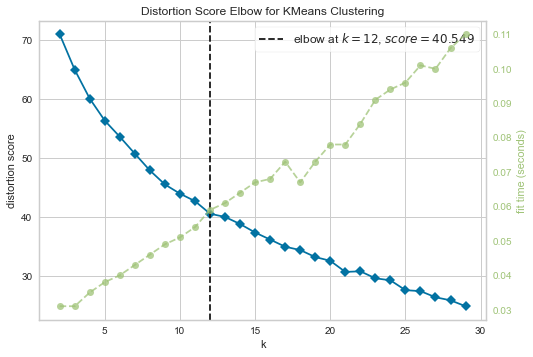

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
X = np.random.rand(100, 10)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure